
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [17]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

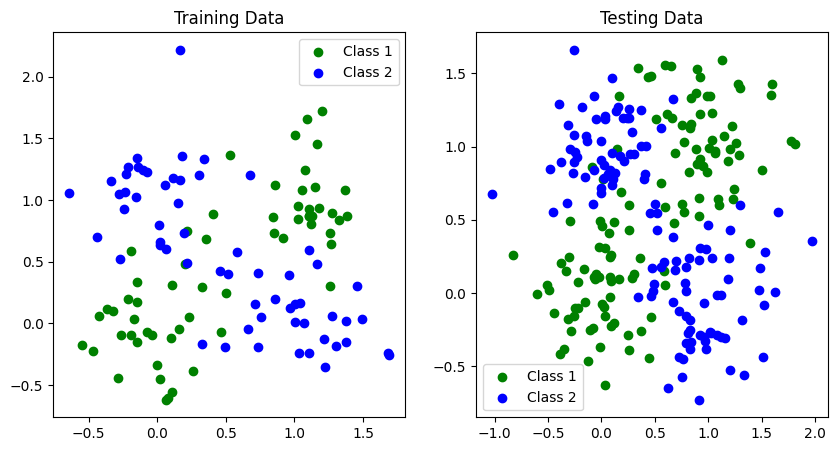

In [18]:
########################################
# Part(a) # Synthetic data generation
########################################
import numpy as np
import matplotlib.pyplot as plt

# Define means and covariances
mean1 = [0, 0]
mean2 = [0, 1]
mean3 = [1, 0]
mean4 = [1, 1]
cov = [[0.1, 0], [0, 0.1]]  # Diagonal covariance matrix

# Sample data points from the bivariate Gaussian distribution
np.random.seed(42)  # For reproducibility
data1 = np.random.multivariate_normal(mean1, cov, 90)
data2 = np.random.multivariate_normal(mean2, cov, 90)
data3 = np.random.multivariate_normal(mean3, cov, 90)
data4 = np.random.multivariate_normal(mean4, cov, 90)

# Generate training data
X_train = np.vstack((data1[:30], data2[:30], data3[:30], data4[:30]))
Y_train = np.hstack((np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)))

# Generate testing data
X_test = np.vstack((data1[30:], data2[30:], data3[30:], data4[30:]))
Y_test = np.hstack((np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)))

# Visualize the data using plt.scatter() function
plt.figure(figsize=(10, 5))

# Training data visualization
plt.subplot(1, 2, 1)
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='green', label='Class 1')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', label='Class 2')
plt.title('Training Data')
plt.legend()

# Testing data visualization
plt.subplot(1, 2, 2)
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2')
plt.title('Testing Data')
plt.legend()

plt.show()







In [20]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self , X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = Y_train

    def predict(self , X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predictions = []
        for test_point in X_test:
            # Compute distances to all training points
            if self.distance_metric == "l2":
                distances = np.linalg.norm(self.X_train - test_point, axis=1)
            elif self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - test_point), axis=1)
            else:
                raise ValueError("Unsupported distance metric")

            # Find the k nearest neighbors and their labels
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]

            # Predict the majority class (+/- sign of sum of labels)
            prediction = np.sign(np.sum(nearest_labels))
            predictions.append(prediction)

        return np.array(predictions)


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    return np.mean(true == pred)


#Create a visual representation of predictions



#Generate and visualize the decision regions and overlay the test points







KNN Classifier Accuracy: 90.00%


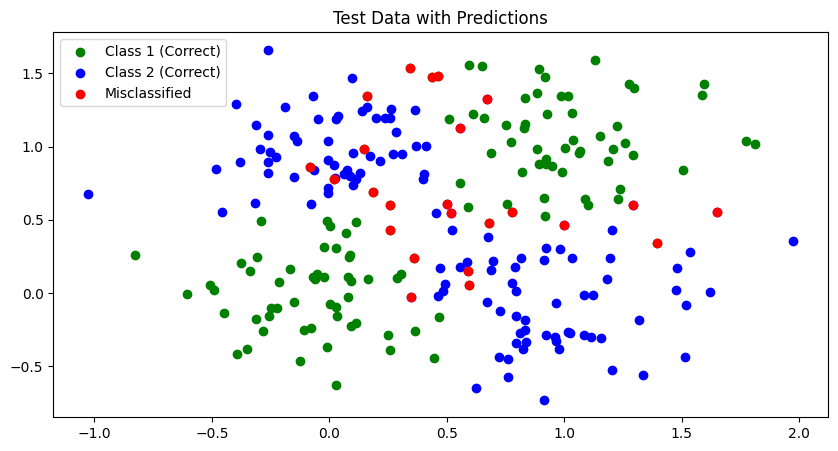

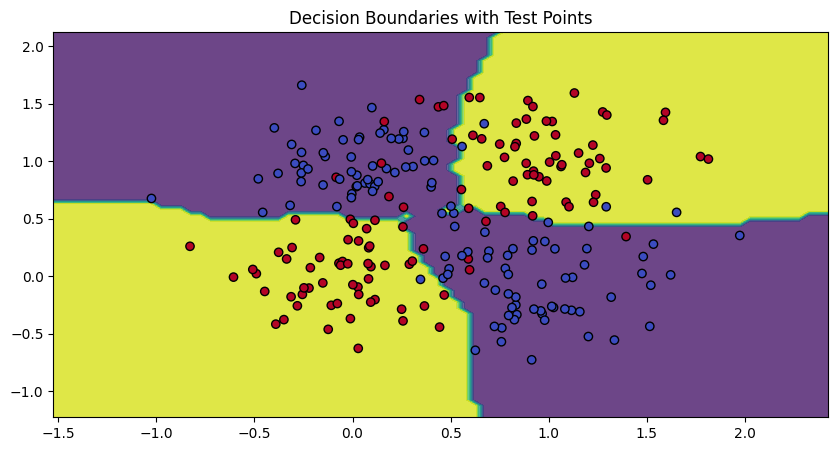

In [28]:
# Instantiate and train the classifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = knn.predict(X_test)  # Define Y_pred here

# Calculate accuracy
accuracy = KNNAccuracy(Y_test, Y_pred)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")

# Visualize predictions with misclassified points highlighted
plt.figure(figsize=(10, 5))
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1 (Correct)')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2 (Correct)')
misclassified_points = Y_pred != Y_test
plt.scatter(X_test[misclassified_points][:, 0], X_test[misclassified_points][:, 1],
            color='red', label='Misclassified')
plt.title('Test Data with Predictions')
plt.legend()
plt.show()

# Generate and visualize the decision regions and overlay the test points
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test,
            edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Decision Boundaries with Test Points')
plt.show()


In [22]:
#import train trst split
from sklearn.model_selection import train_test_split

In [23]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho):
  #Iterate through range of k values
    #Hold out rho fraction of training data in each repetition.



  #Return errors on training and validation data
    train_errors = []
    val_errors = []
    n_repeats = 10  # Number of repetitions

    for k in k_range:
        train_error = 0
        val_error = 0
        for _ in range(n_repeats):
            # Split the data into training and validation sets
            X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train, Y_train, test_size=rho, random_state=None)
            
            # Fit the KNN model
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_cv, y_train_cv)
            
            # Predict on training and validation sets
            train_pred = knn.predict(X_train_cv)
            val_pred = knn.predict(X_val)
            
            # Calculate errors
            train_error += 1 - KNNAccuracy(y_train_cv, train_pred)
            val_error += 1 - KNNAccuracy(y_val, val_pred)
        
        # Average errors over repetitions
        train_errors.append(train_error / n_repeats)
        val_errors.append(val_error / n_repeats)

    return train_errors, val_errors



#Plot training and validation errors for different values of k




#what is the best value for k?




#Effect of rho on k




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).






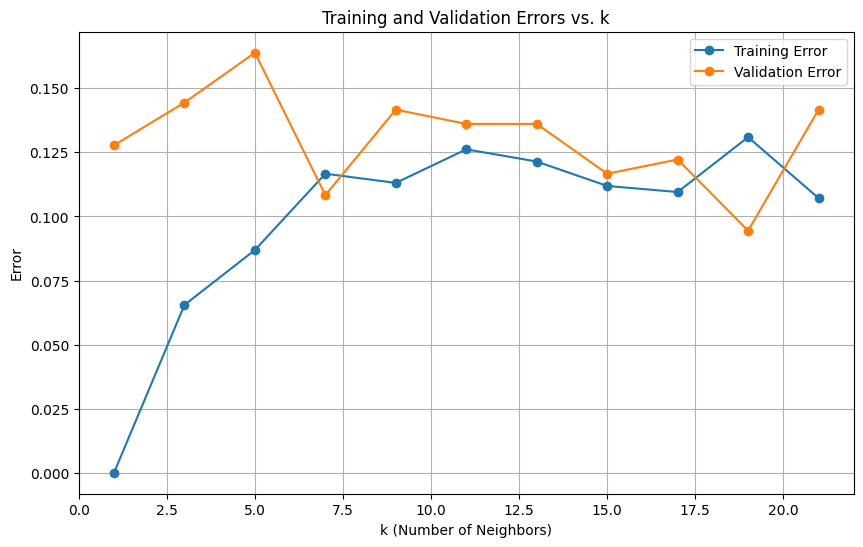

The best value for k is 19 with a validation error of 0.0944.
Effect of rho on k:
As rho increases (more points held out), the stability of the model decreases due to reduced training data.
Increasing the number of repetitions mitigates this instability by averaging results over multiple splits.
Test error with best k (19): 0.1000


In [24]:
# Define the range of k values and rho
k_range = range(1, 22, 2)  # Odd values from 1 to 21
rho = 0.3

# Call the function to get training and validation errors
train_errors, val_errors = holdoutCVkNN(k_range, rho)

# Plot training and validation errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_errors, label='Training Error', marker='o')
plt.plot(k_range, val_errors, label='Validation Error', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Training and Validation Errors vs. k')
plt.legend()
plt.grid()
plt.show()

# What is the best value for k?
best_k_index = np.argmin(val_errors)
best_k = list(k_range)[best_k_index]
print(f"The best value for k is {best_k} with a validation error of {val_errors[best_k_index]:.4f}.")

# Effect of rho on k
print("Effect of rho on k:")
print("As rho increases (more points held out), the stability of the model decreases due to reduced training data.")
print("Increasing the number of repetitions mitigates this instability by averaging results over multiple splits.")

# Evaluate the performance on test set with the best hyperparameters (i.e., best k)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_test_pred = knn_best.predict(X_test)

test_error = 1 - KNNAccuracy(Y_test, Y_test_pred)
print(f"Test error with best k ({best_k}): {test_error:.4f}")

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases







#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian





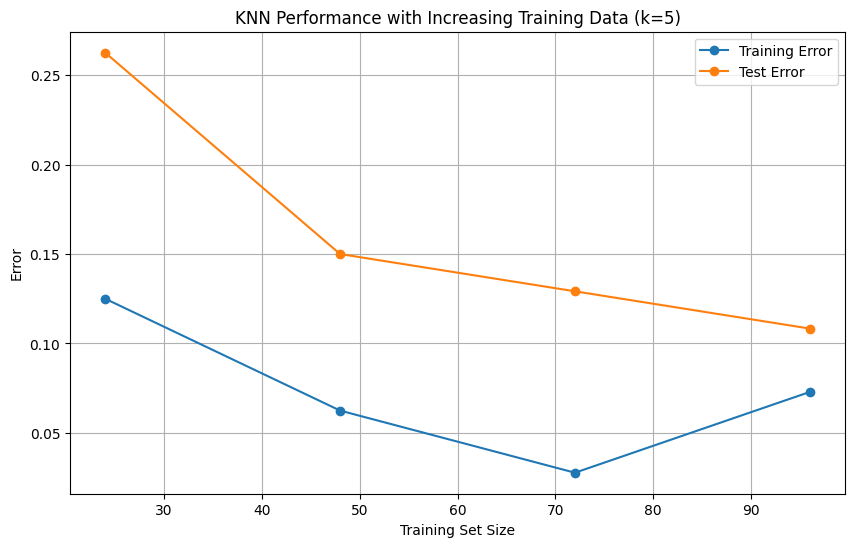

Test error on Gaussian data: 0.1292
Test error on Laplacian data: 0.2292


In [12]:
##################################
# Part(d): Influence of training data on KNN classifier
##################################

# Adjust data_sizes to be proportions less than 1.0
data_sizes = [0.2, 0.4, 0.6, 0.8]  # Proportions of training data (must be < 1.0)
k_fixed = 5  # Fixed k value for evaluation

train_errors = []
test_errors = []

for proportion in data_sizes:
    # Split the dataset into training and testing sets
    X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=proportion, random_state=42)
    
    # Train KNN with the current training size
    knn = KNeighborsClassifier(n_neighbors=k_fixed)
    knn.fit(X_train_subset, Y_train_subset)
    
    # Evaluate on training and testing sets
    train_pred = knn.predict(X_train_subset)
    test_pred = knn.predict(X_test)
    
    train_error = 1 - KNNAccuracy(Y_train_subset, train_pred)
    test_error = 1 - KNNAccuracy(Y_test, test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot([int(proportion * len(X_train)) for proportion in data_sizes], train_errors, label='Training Error', marker='o')
plt.plot([int(proportion * len(X_train)) for proportion in data_sizes], test_errors, label='Test Error', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title(f'KNN Performance with Increasing Training Data (k={k_fixed})')
plt.legend()
plt.grid()
plt.show()




# Performance evaluation with different data distributions (Gaussian vs. Laplacian)
# Generate Laplacian-distributed data
mean1 = [0, 0]
mean2 = [0, 1]
mean3 = [1, 0]
mean4 = [1, 1]
scale = 0.3

np.random.seed(42)
data1_laplace = np.random.laplace(mean1, scale=(scale,), size=(90, 2))
data2_laplace = np.random.laplace(mean2, scale=(scale,), size=(90, 2))
data3_laplace = np.random.laplace(mean3, scale=(scale,), size=(90, 2))
data4_laplace = np.random.laplace(mean4, scale=(scale,), size=(90, 2))

X_train_laplace = np.vstack((data1_laplace[:30], data2_laplace[:30], data3_laplace[:30], data4_laplace[:30]))
Y_train_laplace = np.hstack((np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)))

X_test_laplace = np.vstack((data1_laplace[30:], data2_laplace[30:], data3_laplace[30:], data4_laplace[30:]))
Y_test_laplace = np.hstack((np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)))

# Evaluate KNN performance on Laplacian and Gaussian data
knn_gaussian = KNeighborsClassifier(n_neighbors=5)
knn_gaussian.fit(X_train, Y_train)
gaussian_test_error = 1 - KNNAccuracy(Y_test, knn_gaussian.predict(X_test))

knn_laplace = KNeighborsClassifier(n_neighbors=5)
knn_laplace.fit(X_train_laplace, Y_train_laplace)
laplacian_test_error = 1 - KNNAccuracy(Y_test_laplace, knn_laplace.predict(X_test_laplace))

print(f"Test error on Gaussian data: {gaussian_test_error:.4f}")
print(f"Test error on Laplacian data: {laplacian_test_error:.4f}")


In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric






#Understand the decision regions of KNN classifier with different distance metric







Gaussian Data Test Error (L2): 0.1292
Gaussian Data Test Error (L1): 0.1458


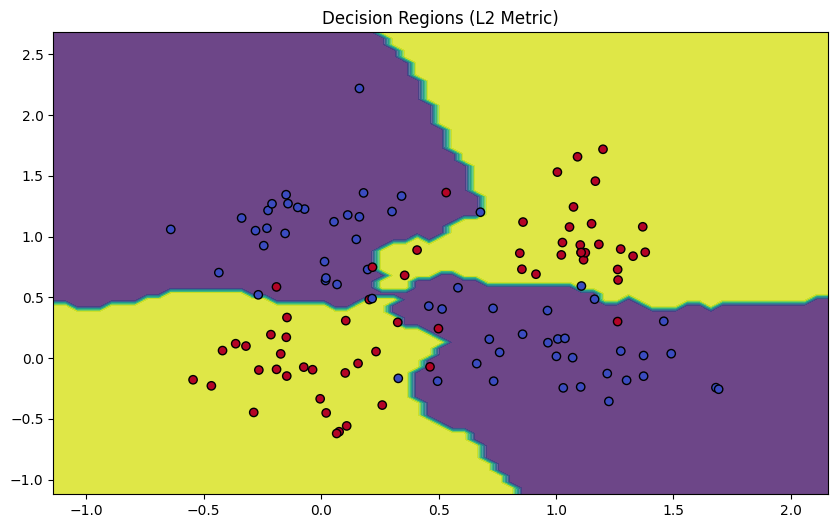

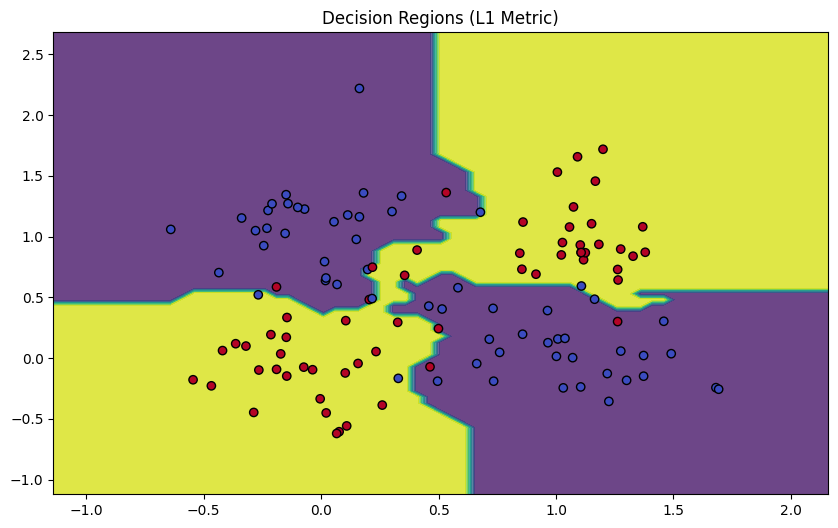

In [29]:
##################################
# Part(e): Influence of distance metric on KNN classifier
##################################

# Performance evaluation of KNN classifier with different distance metrics
knn_gaussian_L2 = KNeighborsClassifier(n_neighbors=5, distance_metric="l2")
knn_gaussian_L2.fit(X_train, Y_train)
gaussian_L2_test_error = 1 - KNNAccuracy(Y_test, knn_gaussian_L2.predict(X_test))

knn_gaussian_L1 = KNeighborsClassifier(n_neighbors=5, distance_metric="l1")
knn_gaussian_L1.fit(X_train, Y_train)
gaussian_L1_test_error = 1 - KNNAccuracy(Y_test, knn_gaussian_L1.predict(X_test))

print(f"Gaussian Data Test Error (L2): {gaussian_L2_test_error:.4f}")
print(f"Gaussian Data Test Error (L1): {gaussian_L1_test_error:.4f}")

# Visualize decision regions for L1 and L2 metrics
def plot_decision_regions(knn_model, X_data, Y_data, title):
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn_model.predict(grid_points).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=Y_data,
                edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Decision regions for L2 metric
plot_decision_regions(knn_gaussian_L2, X_train, Y_train,
                      title="Decision Regions (L2 Metric)")

# Decision regions for L1 metric
plot_decision_regions(knn_gaussian_L1, X_train, Y_train,
                      title="Decision Regions (L1 Metric)")


In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits




#Write 'MultiClassKNNClassify' function




#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data




#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation




#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels



#Suggest an alternative ways to improve performance





c:\codey\mlproject_temp\myenv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


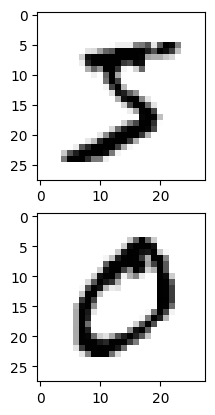

Training set size: 56000
Validation set size: 7000
Test set size: 7000
k=1, metric=l2, Validation Accuracy=0.2129


In [ ]:
##################################
# Part(f): MNIST Digit classification using KNN classifier
##################################

# Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data.to_numpy()
targets = mnist.target.astype(int).to_numpy()

# Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Create train, validation, and test splits
X_train_full, X_test, Y_train_full, Y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.1111, random_state=42)  # 10% of 90% is ~10%

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Write 'MultiClassKNNClassify' function
class MultiClassKNNClassifier(KNeighborsClassifier):
    """
    Multi-class KNN Classifier extending the existing KNeighborsClassifier.
    """

# Empirically choose the most suitable k and distance metric based on evaluation on validation data
k_values = [1, 3, 5]
distance_metrics = ["l2", "l1"]

best_k = None
best_metric = None
best_accuracy = 0

for k in k_values:
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=k, distance_metric=metric)
        knn.fit(X_train, Y_train)
        val_pred = knn.predict(X_val)
        accuracy = KNNAccuracy(Y_val, val_pred)
        print(f"k={k}, metric={metric}, Validation Accuracy={accuracy:.4f}")

        if accuracy > best_accuracy:
            best_k = k
            best_metric = metric
            best_accuracy = accuracy

print(f"Best hyperparameters: k={best_k}, metric={best_metric}")

# Evaluate the performance on test data with the best hyperparameters obtained from cross-validation
knn_best = KNeighborsClassifier(n_neighbors=best_k, distance_metric=best_metric)
knn_best.fit(X_train_full, Y_train_full)  # Train on full training data
Y_test_pred = knn_best.predict(X_test)

test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
print(f"Test Accuracy with best hyperparameters: {test_accuracy:.4f}")

# Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    """
    Inputs: Ground truth labels and classifier predictions.
    Outputs: Confusion matrix.
    """
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

compute_confusion_matrix(Y_test, Y_test_pred)

# Suggest alternative ways to improve performance
print("Suggestions to improve performance:")
print("1. Use dimensionality reduction techniques (e.g., PCA) to reduce the feature space.")
print("2. Experiment with ensemble methods like bagging or boosting.")
print("3. Try advanced classifiers such as SVM or neural networks.")
print("4. Perform hyperparameter tuning with a more extensive grid search.")



<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
